In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from scipy import stats

In [27]:
sns.set_style("white", {'axes.grid' : False})
sns.set_palette("tab20", 16)
sns.set(font="Calibri")
sns.set_context('talk')

In [28]:
df = pd.read_csv('calibration_master_metadata.csv', parse_dates= ['created_at'])
df

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,2020-07-15 13:00:00+03:00,Makerere,44.753333,55.150000,43.483333,53.260000,0.656500,25.925000,0.333501,32.568561,1233,6340,21,28,8518,475,61.6
1,2020-07-15 14:00:00+03:00,Makerere,36.145000,42.455000,34.680000,40.605000,0.641583,26.258333,0.333501,32.568561,1233,6340,21,28,8518,475,22.1
2,2020-07-15 15:00:00+03:00,Makerere,37.252222,44.076667,35.420000,42.036667,0.612250,27.050000,0.333501,32.568561,1233,6340,21,28,8518,475,20.8
3,2020-07-15 16:00:00+03:00,Makerere,41.094000,49.526000,39.524000,48.252000,0.640167,26.691667,0.333501,32.568561,1233,6340,21,28,8518,475,32.1
4,2020-07-15 17:00:00+03:00,Makerere,42.662222,52.036667,40.505556,50.114444,0.637167,26.100000,0.333501,32.568561,1233,6340,21,28,8518,475,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13660,2021-02-28 19:00:00+03:00,USEmbassy,57.689250,76.283500,56.324500,68.138000,0.705083,25.716667,0.299255,32.592686,1199,4374,21,14,6834,130,57.0
13661,2021-02-28 20:00:00+03:00,USEmbassy,56.116744,76.364419,54.627442,68.844884,0.771750,24.833333,0.299255,32.592686,1199,4374,21,14,6834,130,68.0
13662,2021-02-28 21:00:00+03:00,USEmbassy,69.686190,90.403810,67.430714,78.187381,0.807500,24.100000,0.299255,32.592686,1199,4374,21,14,6834,130,83.0
13663,2021-02-28 22:00:00+03:00,USEmbassy,62.886364,82.951818,60.832045,73.314318,0.837667,23.616667,0.299255,32.592686,1199,4374,21,14,6834,130,78.0


In [29]:
df['difference'] = df.pm2_5 - df.ref_pm2_5

### Difference by hour of the day

In [30]:
df['hour'] = df['created_at'].dt.hour

In [31]:
df_hr_grp = df.groupby(['site', 'hour']).mean().reset_index()
df_hr_grp

,site,hour,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference
0,Makerere,0,67.877123,77.571493,63.467214,75.125026,0.876610,20.068684,0.333501,32.568561,1233,6340,21,28,8518,475,46.053374,21.823749
1,Makerere,1,63.497935,72.772731,59.259652,70.324160,0.893293,19.875716,0.333501,32.568561,1233,6340,21,28,8518,475,41.208589,22.289346
2,Makerere,2,60.325781,69.151957,56.304970,66.817513,0.903220,19.668354,0.333501,32.568561,1233,6340,21,28,8518,475,38.516564,21.809216
3,Makerere,3,58.584848,67.385164,54.687161,65.078877,0.912944,19.444547,0.333501,32.568561,1233,6340,21,28,8518,475,36.700617,21.884230
4,Makerere,4,56.682872,65.376691,52.665754,62.874503,0.918744,19.310429,0.333501,32.568561,1233,6340,21,28,8518,475,34.631902,22.050970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,USEmbassy,19,60.808599,72.115070,55.268175,65.950492,0.783911,22.609605,0.299255,32.592686,1199,4374,21,14,6834,130,70.049844,-9.241246
68,USEmbassy,20,72.432715,84.246700,65.394583,76.792747,0.819507,21.904557,0.299255,32.592686,1199,4374,21,14,6834,130,82.181250,-9.748535
69,USEmbassy,21,74.187872,85.772041,66.998217,78.166180,0.841118,21.501858,0.299255,32.592686,1199,4374,21,14,6834,130,85.078125,-10.890253
70,USEmbassy,22,72.733068,83.860546,65.415447,76.246734,0.858140,21.186771,0.299255,32.592686,1199,4374,21,14,6834,130,82.093750,-9.360682


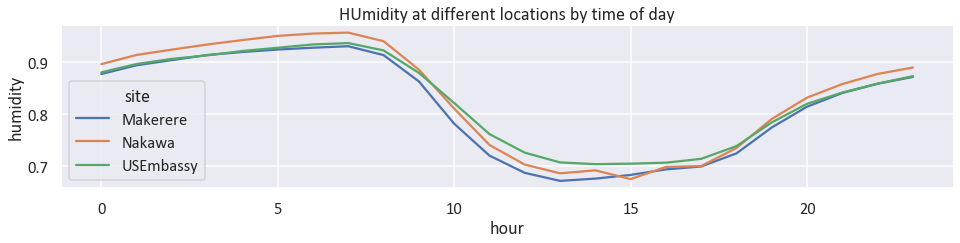

In [32]:
fig, ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=df_hr_grp, x= 'hour', y='humidity', hue='site')
# sns.lineplot(data=df_hr_grp, x= 'hour', y='temp', hue='site')
plt.title('HUmidity at different locations by time of day')
plt.show()

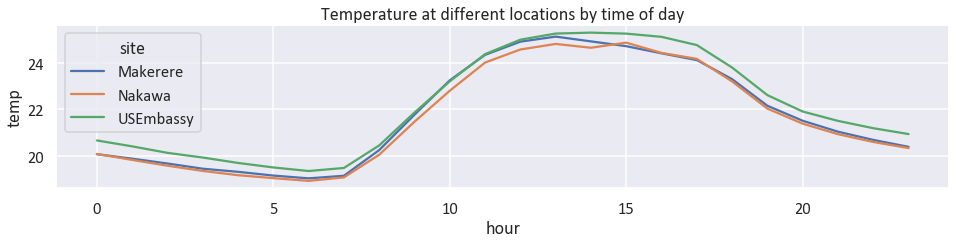

In [33]:
fig, ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=df_hr_grp, x= 'hour', y='temp', hue='site')
# sns.lineplot(data=df_hr_grp, x= 'hour', y='temp', hue='site')
plt.title('Temperature at different locations by time of day')
plt.show()

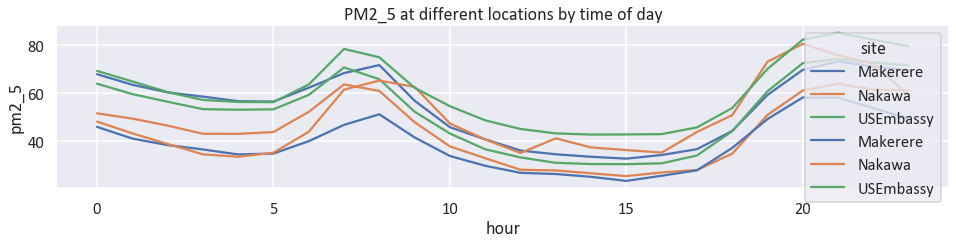

In [34]:
fig, ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=df_hr_grp, x= 'hour', y='pm2_5', hue='site')
sns.lineplot(data=df_hr_grp, x= 'hour', y='ref_pm2_5', hue='site')
# sns.lineplot(data=df_hr_grp, x= 'hour', y='temp', hue='site')
plt.title('PM2_5 at different locations by time of day')
plt.show()

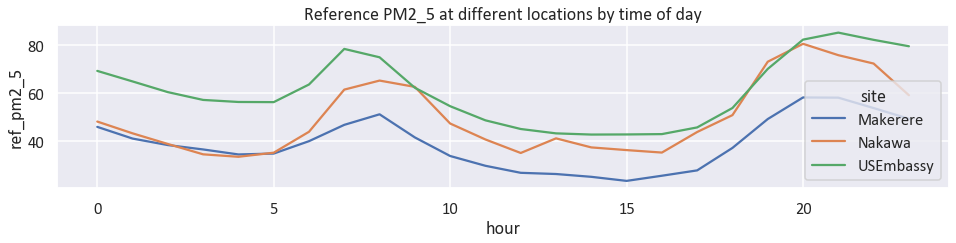

In [35]:
fig, ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=df_hr_grp, x= 'hour', y='ref_pm2_5', hue='site')
# sns.lineplot(data=df_hr_grp, x= 'hour', y='temp', hue='site')
plt.title('Reference PM2_5 at different locations by time of day')
plt.show()

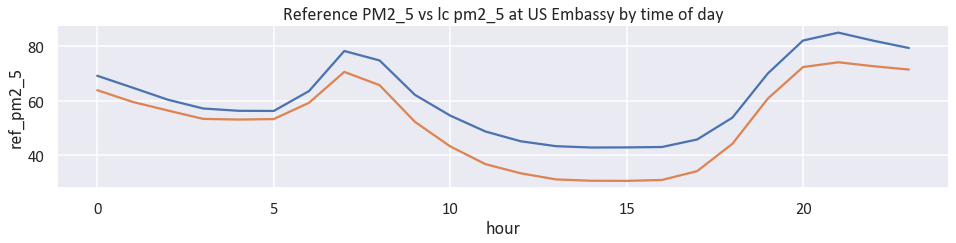

In [36]:
fig, ax = plt.subplots(figsize=(16,3))
df_usemb = df_hr_grp.loc[df_hr_grp.site == 'USEmbassy']
sns.lineplot(data=df_usemb, x= 'hour', y='ref_pm2_5')
sns.lineplot(data=df_usemb, x= 'hour', y='pm2_5')
plt.title('Reference PM2_5 vs lc pm2_5 at US Embassy by time of day')
plt.show()

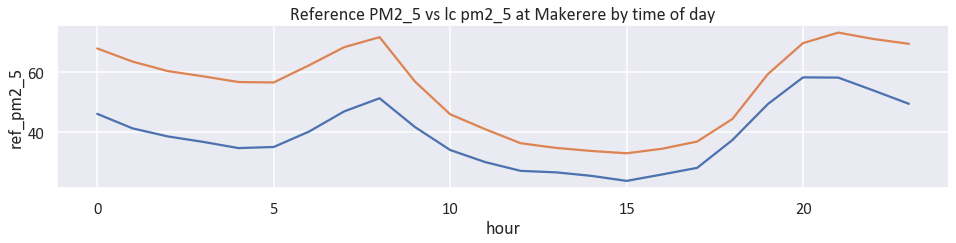

In [37]:
fig, ax = plt.subplots(figsize=(16,3))
df_usemb = df_hr_grp.loc[df_hr_grp.site == 'Makerere']
sns.lineplot(data=df_usemb, x= 'hour', y='ref_pm2_5')
sns.lineplot(data=df_usemb, x= 'hour', y='pm2_5')
plt.title('Reference PM2_5 vs lc pm2_5 at Makerere by time of day')
plt.show()

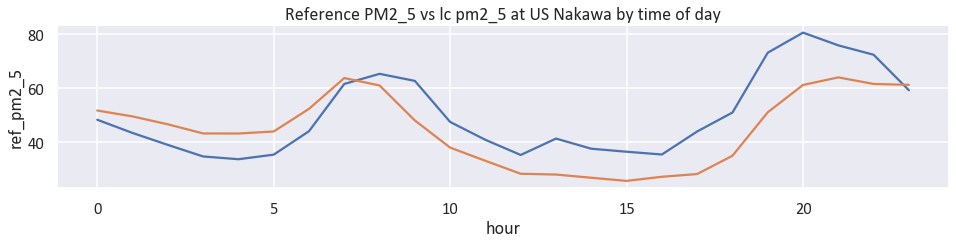

In [38]:
fig, ax = plt.subplots(figsize=(16,3))
df_usemb = df_hr_grp.loc[df_hr_grp.site == 'Nakawa']
sns.lineplot(data=df_usemb, x= 'hour', y='ref_pm2_5')
sns.lineplot(data=df_usemb, x= 'hour', y='pm2_5')
plt.title('Reference PM2_5 vs lc pm2_5 at US Nakawa by time of day')
plt.show()

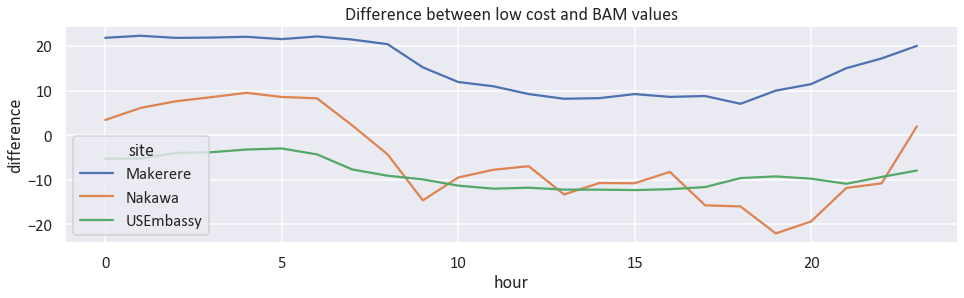

In [39]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_hr_grp, x= 'hour', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.show()

In [40]:
df['doy'] = df['created_at'].dt.weekofyear

In [41]:
df_doy_grp = df.groupby(['site', 'doy']).mean().reset_index()
df_doy_grp.head()

,site,doy,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference,hour
0,Makerere,1,43.343856,50.028639,41.244231,48.796510,0.818550,21.943204,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,30.706548,12.637309,11.500000
1,Makerere,2,86.075075,94.706473,81.170257,92.499017,0.901541,21.131716,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,57.926866,28.148209,10.791045
2,Makerere,3,66.926172,75.492437,62.950986,73.363060,0.833644,21.790385,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,48.229487,18.696684,11.897436
3,Makerere,4,41.207580,48.344319,39.577501,47.437224,0.796613,22.253788,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,32.014545,9.193035,11.496970
4,Makerere,5,57.271055,67.117820,54.685919,65.006259,0.739992,23.253721,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,56.360377,0.910678,11.251572


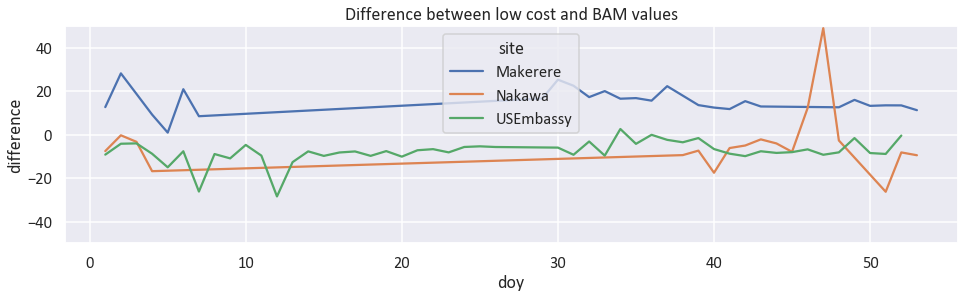

In [42]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_doy_grp, x= 'doy', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.ylim(-50,50)
plt.show()

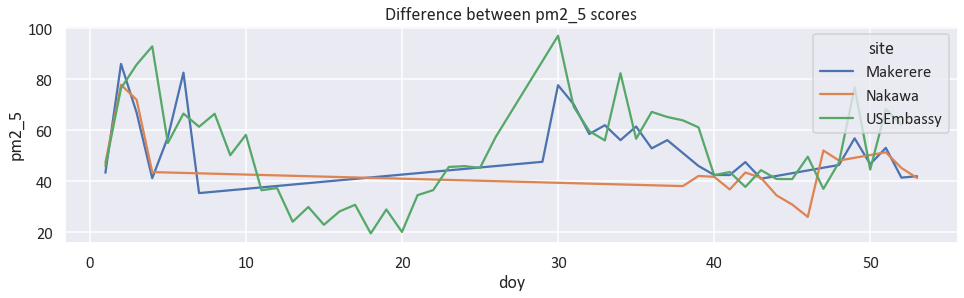

In [43]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_doy_grp, x= 'doy', y='pm2_5', hue='site')
plt.title('Difference between pm2_5 scores')

plt.show()

### Difference by day of the year

In [44]:
df['month'] = df['created_at'].dt.month

In [45]:
df_month_grp = df.groupby(['site', 'month']).mean().reset_index()
df_month_grp.head()

,site,month,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference,hour,doy
0,Makerere,1,51.796147,59.074909,49.149734,57.671509,0.835555,21.683878,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,37.167464,14.628683,11.518341,8.282297
1,Makerere,2,63.046550,72.155194,60.271425,70.431957,0.789302,23.301602,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,52.469100,10.577450,11.221411,5.819951
2,Makerere,7,70.216311,79.069165,64.894504,75.951209,0.769176,22.071921,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,47.189175,23.027136,11.685567,30.046392
3,Makerere,8,58.328380,67.406854,54.577502,65.212496,0.800124,21.657536,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,40.889632,17.438748,11.499318,33.402456
4,Makerere,9,50.714688,58.779424,47.345937,56.578882,0.838767,21.110943,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,35.129023,15.585665,11.600575,37.551724


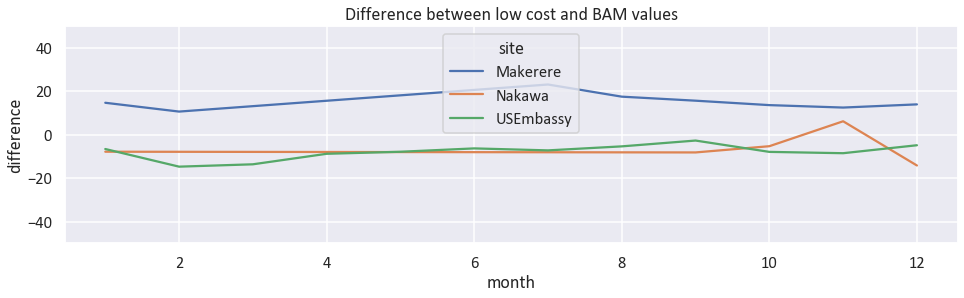

In [46]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_month_grp, x= 'month', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.ylim(-50,50)
plt.show()

Slope: 0.811931976401875, Intercept: 8.636835387989407
Correlation coefficient:  0.8263576324654007


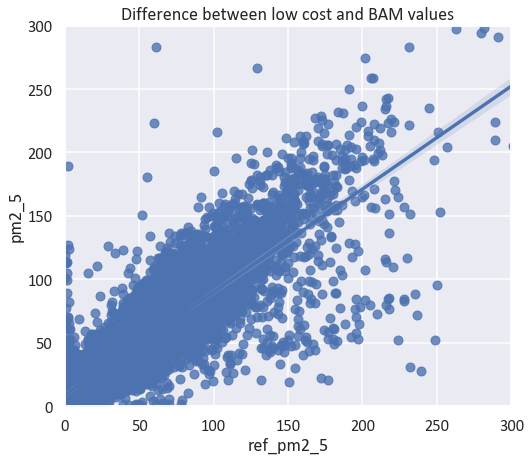

In [47]:
# Calculating the slope and intercept betwee true and prediction
result = stats.linregress(df.ref_pm2_5, df.pm2_5)
print('Slope: {}, Intercept: {}'.format (result[0], result[1]))
print('Correlation coefficient: ', (df.ref_pm2_5.corr( df.pm2_5)))

fig, ax = plt.subplots(figsize=(8,7))
sns.regplot(data=df, y= 'pm2_5', x='ref_pm2_5', fit_reg=True)
plt.title('Difference between low cost and BAM values')
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

In [48]:
df.ref_pm2_5.value_counts(sort='ascending')

38.0     196
36.0     183
27.0     171
34.0     164
48.0     163
        ... 
184.0      1
114.6      1
235.0      1
245.0      1
237.0      1
Name: ref_pm2_5, Length: 1295, dtype: int64

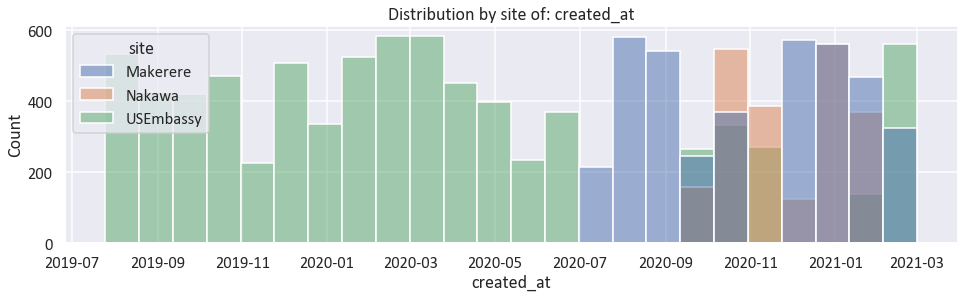

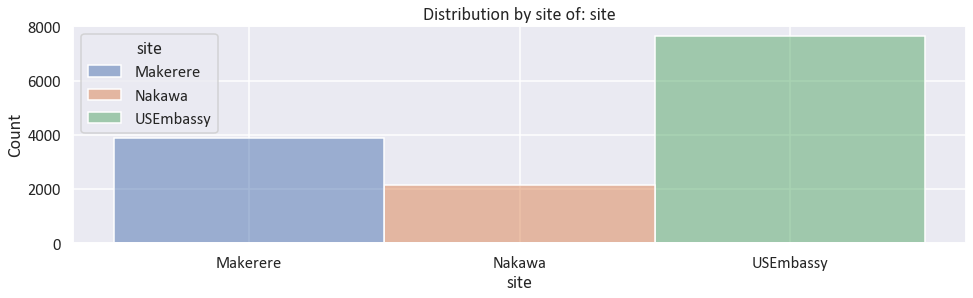

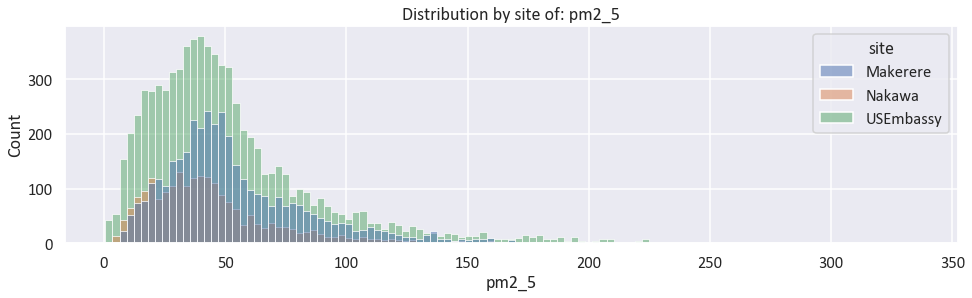

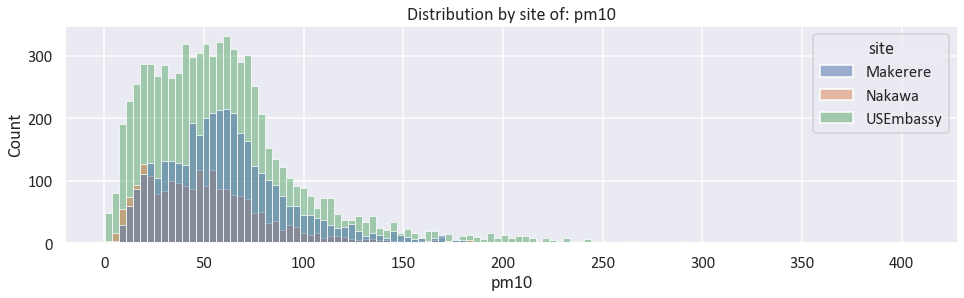

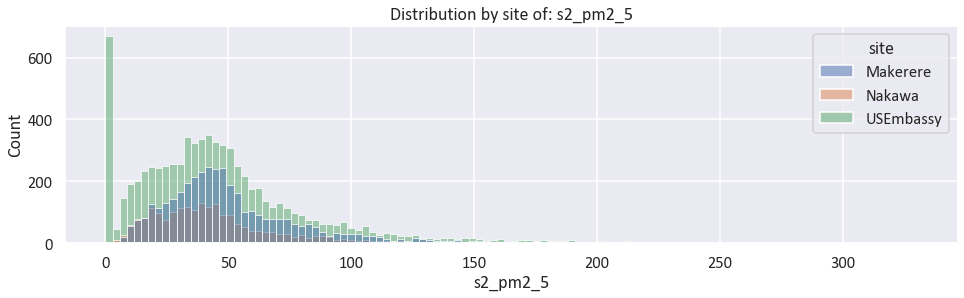

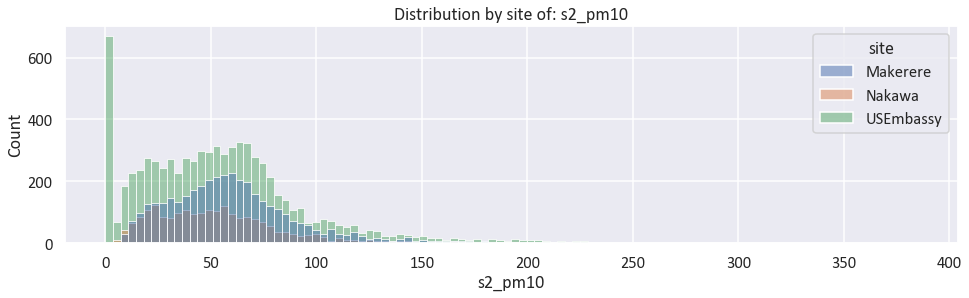

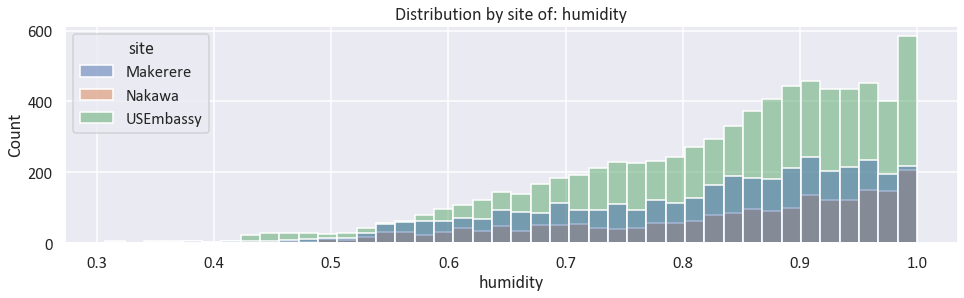

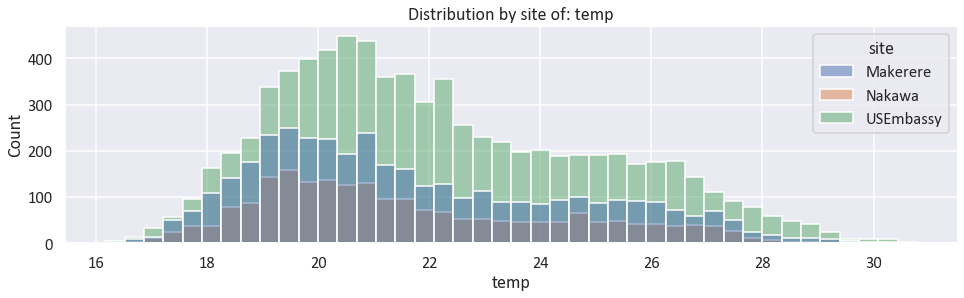

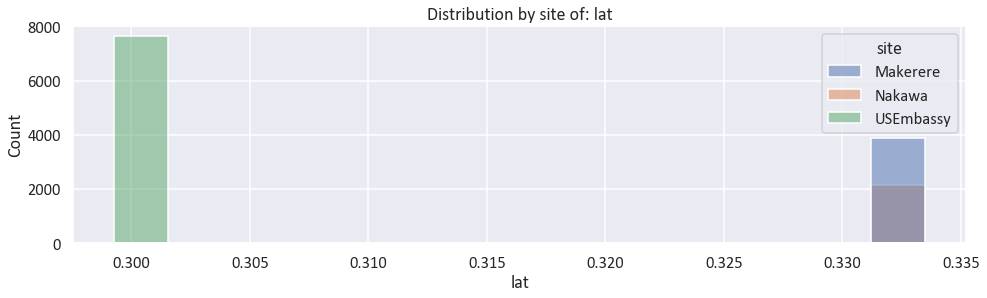

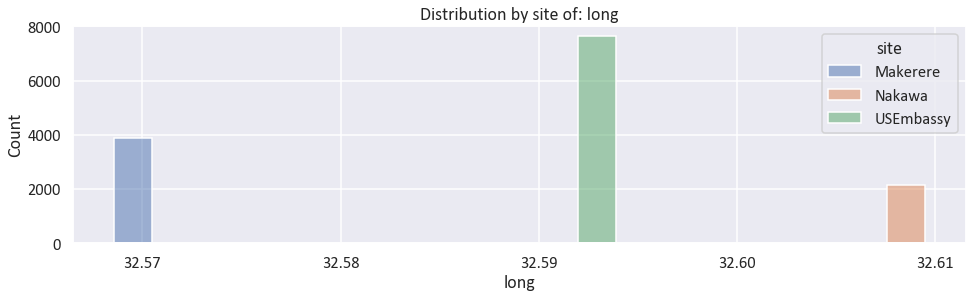

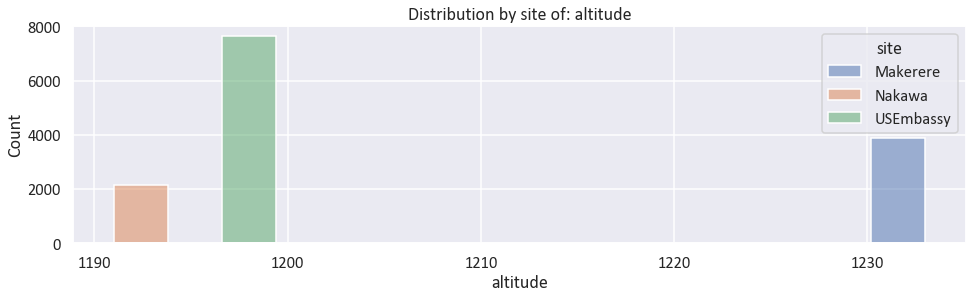

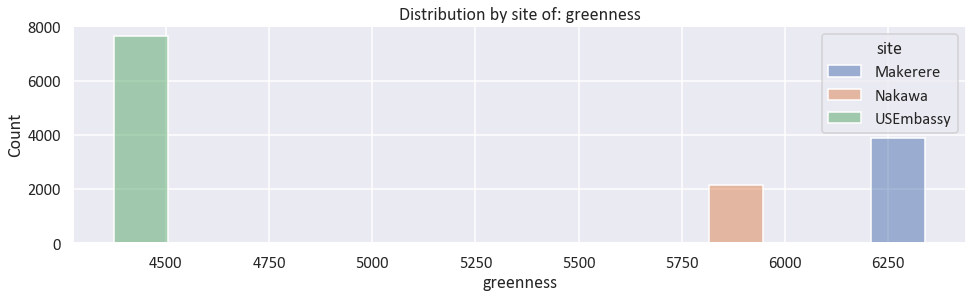

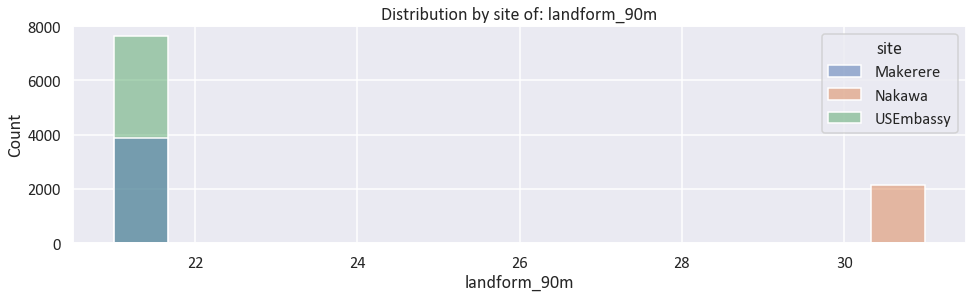

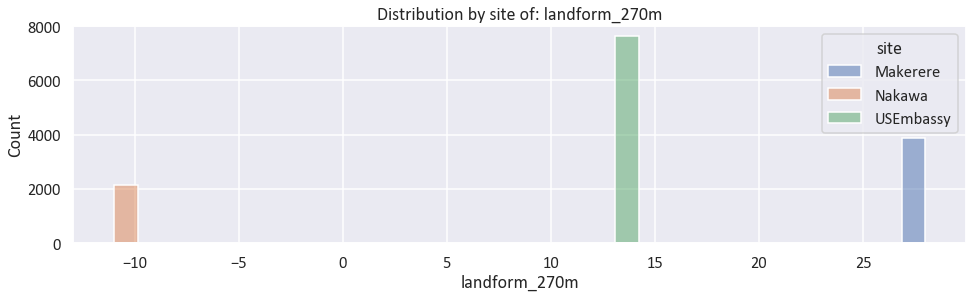

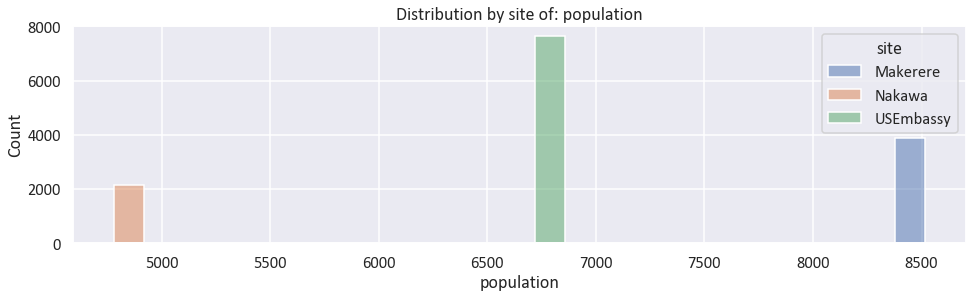

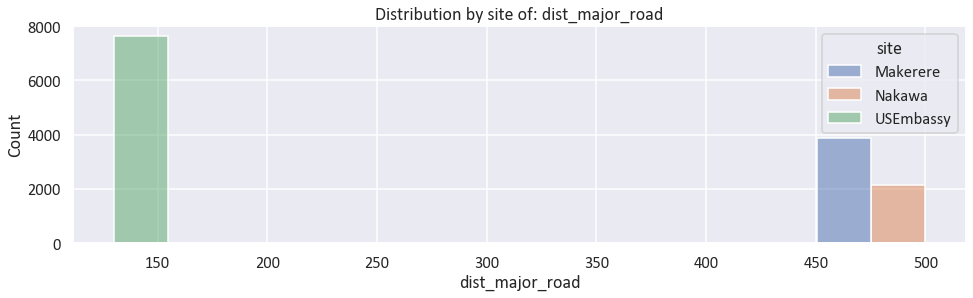

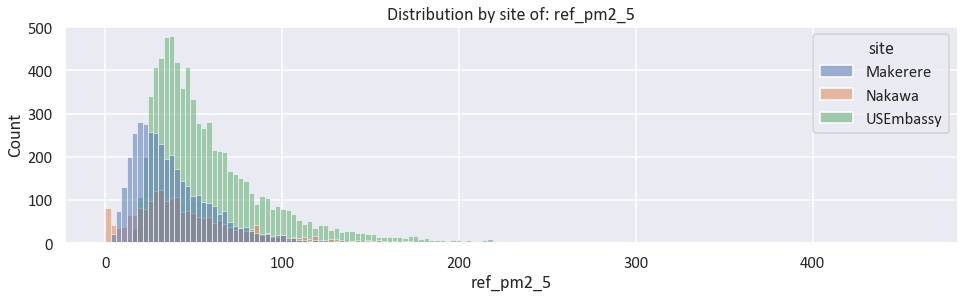

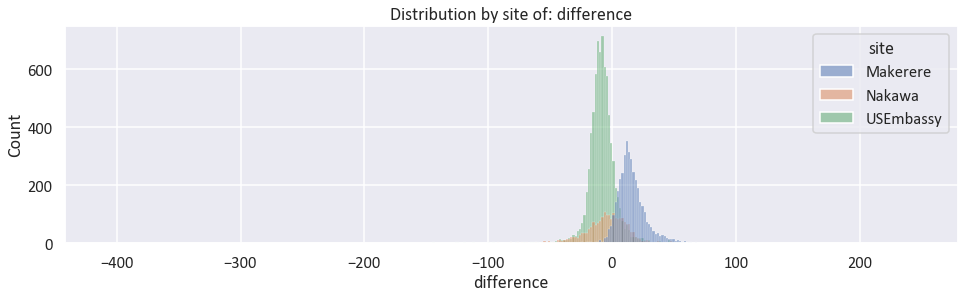

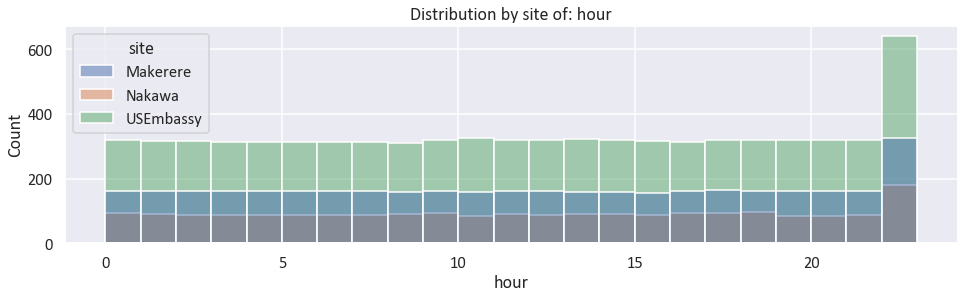

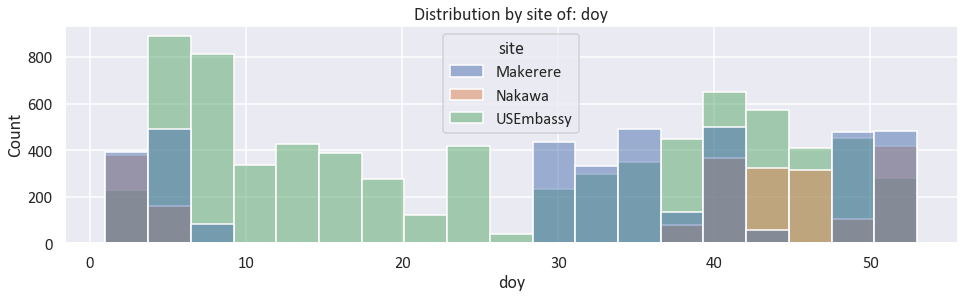

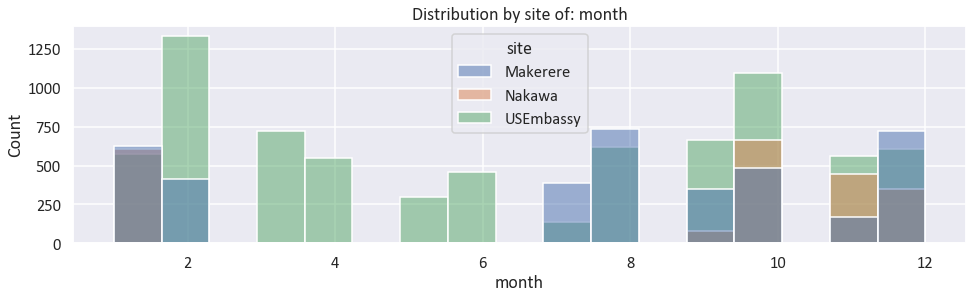

In [49]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(16,4))
    sns.histplot(data=df, x=col, hue='site')
    plt.title('Distribution by site of: ' +str(col))
    plt.show()

In [50]:
# Baseline
